In [1]:
import os
import pickle
from kid_readout.utils import readoutnc
from kid_readout.analysis import noise_measurement, iqnoise
plt.rcParams['font.size'] = 11
import utilities

updated file list


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
data_directory = '/data/readout'
resonator_index = 13  # This should be the 164 MHz resonance, aka channel 8

with open('cw_ncs.pkl') as f:
    cw_ncs = pickle.load(f)
with open('bb_ncs.pkl') as f:
    bb_ncs = pickle.load(f)

In [3]:
index_a29 = 7
pca_NFFT = 2**15

In [4]:
cw_snm_a29_tt07 = noise_measurement.SweepNoiseMeasurement(cw_ncs[11],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          pca_NFFT=pca_NFFT,
                                                         )
sum(cw_snm_a29_tt07.mmw_atten_turns)

/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:235: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:, i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:236: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:, i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:144: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0, k] = ss[0, 0]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1, k] = ss[1, 1]


7.0

In [5]:
cw_snm_a29_tt17 = noise_measurement.SweepNoiseMeasurement(cw_ncs[1],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          pca_NFFT=pca_NFFT,
                                                         )
sum(cw_snm_a29_tt17.mmw_atten_turns)

17.0

# Investigate current binning

In [6]:
S, f = mlab.psd(cw_snm_a29_tt07.fractional_fluctuation_timeseries.real,
                Fs=cw_snm_a29_tt07.timeseries_sample_rate,
                NFFT=pca_NFFT,
                detrend=mlab.detrend_mean,
                window=mlab.window_hanning)
n_averaged = cw_snm_a29_tt07.fractional_fluctuation_timeseries.size / pca_NFFT
var = S**2 / n_averaged

Test current log binning:

In [7]:
bin_edges = iqnoise.make_freq_bins(f)
bin_edges.shape

(117,)

In [8]:
bin_indices = np.digitize(f, bin_edges)
bin_indices.max()

117

In [9]:
np.array([range(1, len(bin_edges))]).max()

116

In [10]:
bin_indices[-10:]

array([117, 117, 117, 117, 117, 117, 117, 117, 117, 117])

In [11]:
f[-10:]

array([ 7808.20846558,  7808.68530273,  7809.16213989,  7809.63897705,
        7810.11581421,  7810.59265137,  7811.06948853,  7811.54632568,
        7812.02316284,  7812.5       ])

In [12]:
iqnoise.make_freq_bins(f)[-10:]

array([ 4096.,  4352.,  4608.,  4864.,  5120.,  5632.,  6144.,  6656.,
        7168.,  7680.])

In [13]:
obf, obd = iqnoise.log_bin(f, S)

In [14]:
obf[-3:]

array([ 6399.86991882,  6911.99302673,  7424.11613464])

Conclusion is that current log binning throws away data in last bin.

In [15]:
bf, bd, bc, bv = iqnoise.log_bin_with_errors(f, S, var)

In [16]:
sum(bc) == len(f)

True

In [17]:
n_averaged

16.0

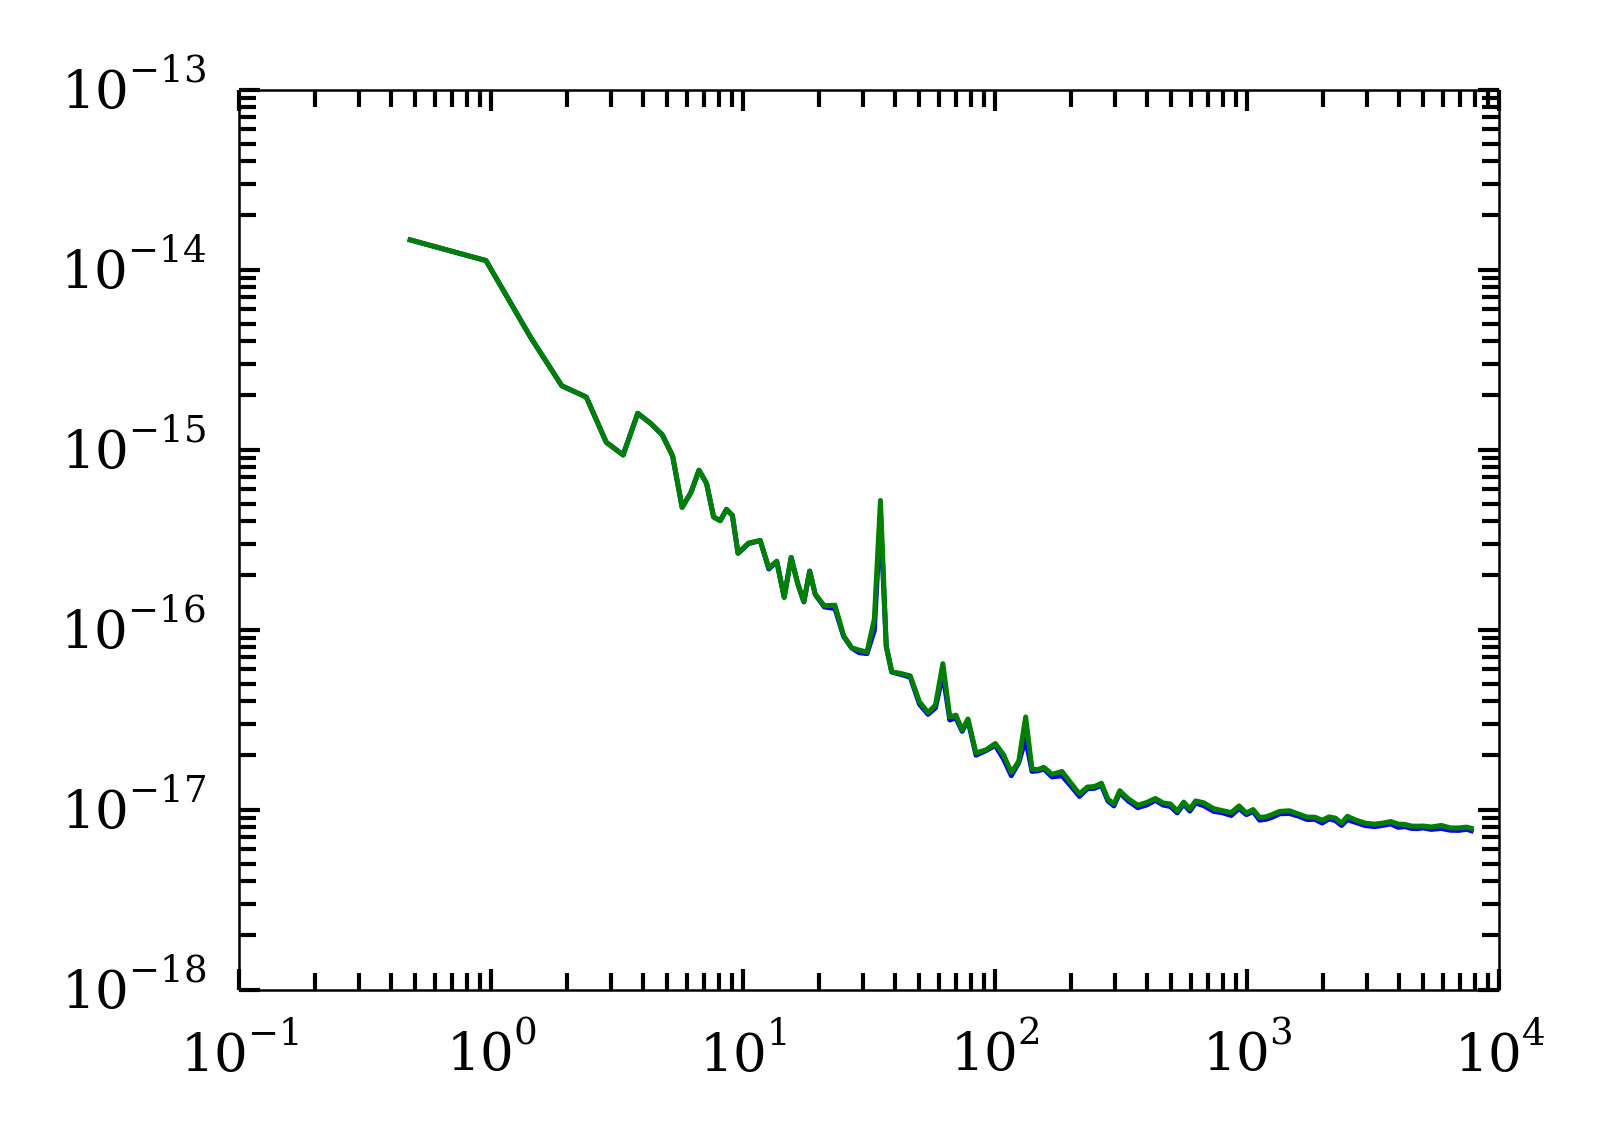

In [18]:
plt.loglog(bf, bd)
plt.loglog(bf, (bv * n_averaged * bc)**(1/2))

# Test log binning with errors

In [19]:
bf, S, evals, evects, angles, spectra, counts, var = iqnoise.pca_noise_with_errors(cw_snm_a29_tt17.fractional_fluctuation_timeseries,
                                                                      pca_NFFT,
                                                                      cw_snm_a29_tt17.timeseries_sample_rate)

In [20]:
var.shape

(2, 117)

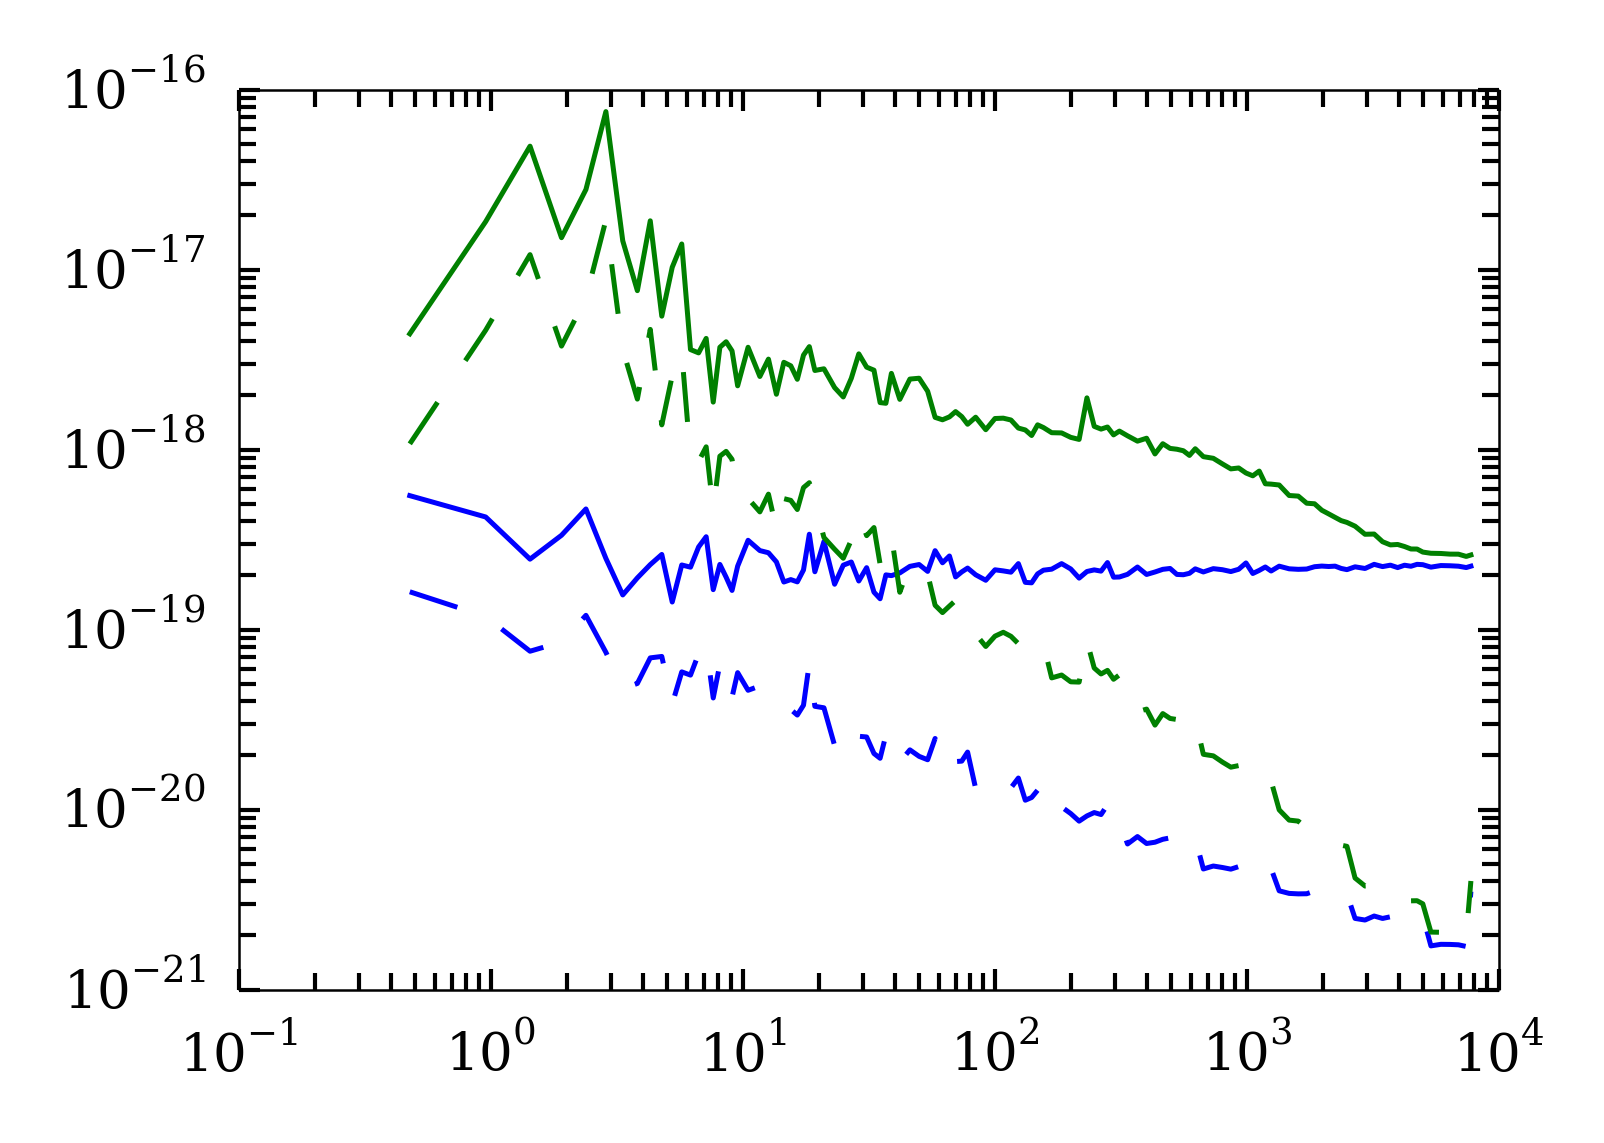

In [21]:
plt.loglog(bf, evals[0], '-b')
plt.loglog(bf, var[0]**(1/2), '--b')
plt.loglog(bf, evals[1], '-g')
plt.loglog(bf, var[1]**(1/2), '--g')

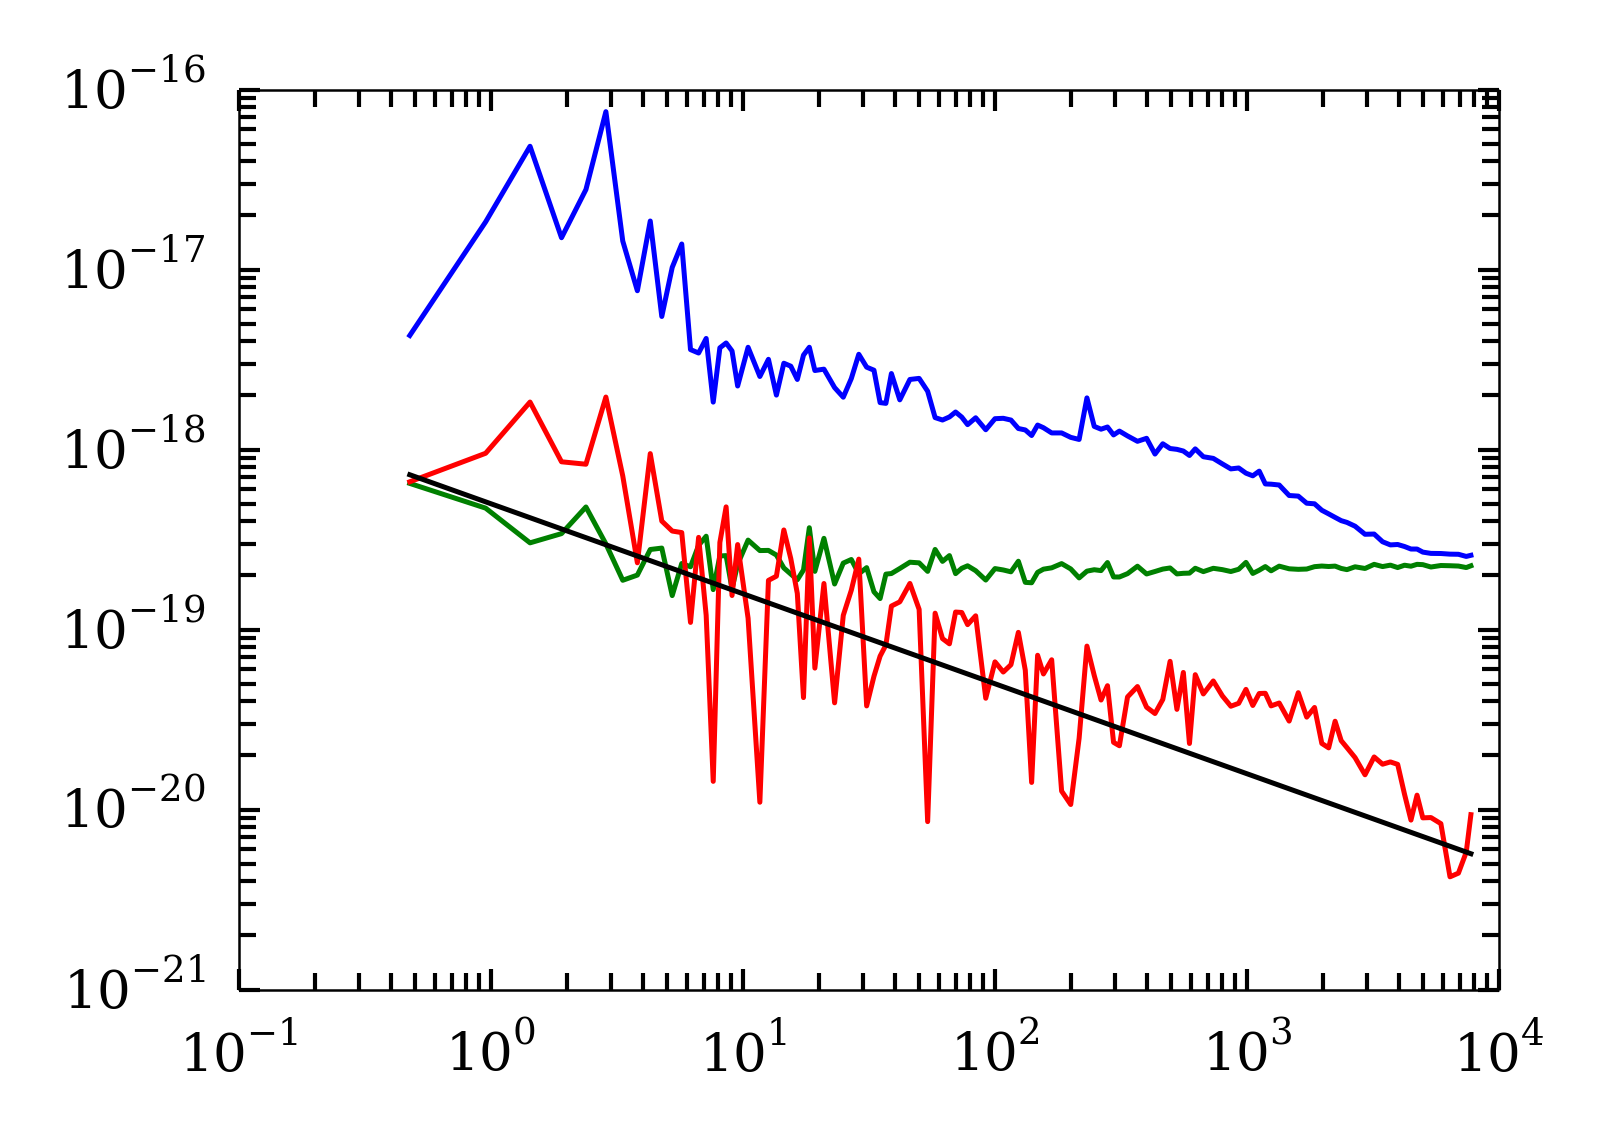

In [22]:
plt.loglog(bf, spectra[0], '-b')
plt.loglog(bf, spectra[1], '-g')
plt.loglog(bf, np.abs(spectra[2]), '-r')
plt.loglog(bf, 5e-19 * bf**(-1/2), '-k')

# New log binning

Ignore; this currently doesn't work if the input data is not equally-spaced.

In [23]:
utilities.snm_log_bin(cw_snm_a29_tt07, eigvals=0)
utilities.snm_log_bin(cw_snm_a29_tt07, eigvals=1)

In [27]:
np.diff(cw_snm_a29_tt07.bin_edges_0)

array([ 0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.95367432,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.47683716,  0.47683716,  0.95367432,  0.47683716,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.95367432,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.95367432,
        0.47683716,  0.47683716,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.95367432,  0.47683716,  0.47683716,  0.47683716,
        0.47683716,  0.47683716,  0.95367432,  0.47683716,  0.47

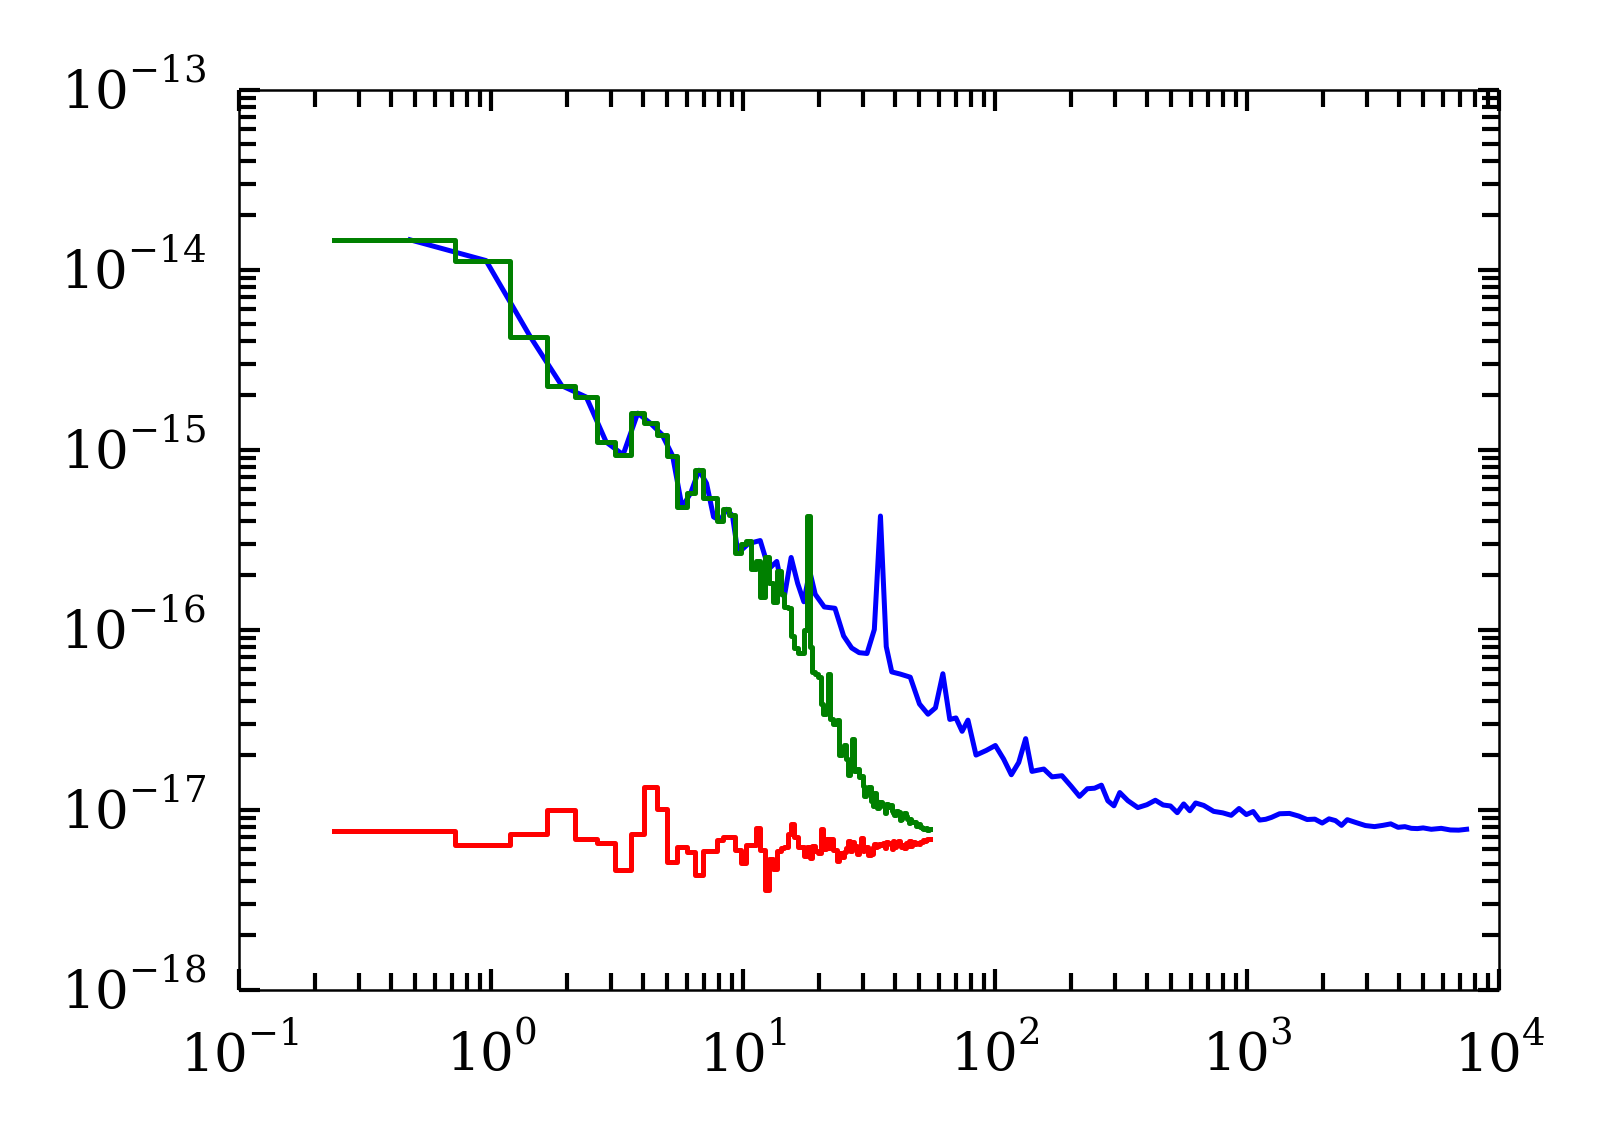

In [24]:
fig, ax = plt.subplots()
ax.plot(cw_snm_a29_tt07.pca_freq, cw_snm_a29_tt07.pca_eigvals[1])
utilities.histogram(ax, cw_snm_a29_tt07.bin_edges_1, cw_snm_a29_tt07.binned_data_1)
utilities.histogram(ax, cw_snm_a29_tt07.bin_edges_0, cw_snm_a29_tt07.binned_data_0)

ax.set_xscale('log')
ax.set_yscale('log')